<a href="https://colab.research.google.com/github/LLegler89/Portfolio/blob/main/Lung_Cancer_Severity_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Lung cancer data

DOI: 10.1016/j.heliyon.2020.e03402

URL: https://www.cell.com/heliyon/fulltext/S2405-8440(20)30247-4?_returnURL=https%3A%2F%2Flinkinghub.elsevier.com%2Fretrieve%2Fpii%2FS2405844020302474%3Fshowall%3Dtrue


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans, MeanShift, DBSCAN
from sklearn.metrics import silhouette_score, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from statistics import mean, stdev
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.colors import ListedColormap

In [2]:
# Load Data Frame

df = pd.read_csv('/content/cancer patient data sets.csv')

# Investigate Data Frame

print(df.head())
print(df.info())
print(df.describe())

   index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0      0         P1   33       1              2            4             5   
1      1        P10   17       1              3            1             5   
2      2       P100   35       1              4            5             6   
3      3      P1000   37       1              7            7             7   
4      4       P101   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  ...  Fatigue  \
0                     4             3                     2  ...        3   
1                     3             4                     2  ...        1   
2                     5             5                     4  ...        8   
3                     7             6                     7  ...        4   
4                     7             7                     6  ...        3   

   Weight Loss  Shortness of Breath  Wheezing  Swallowing Difficulty

In [3]:
# Convert Gender to String

df['Gender'] = str(df['Gender'])

# Drop Unnecessary Columns

df.drop(['Patient Id','index'], axis=1, inplace=True)

# Confirm Changes

print(df.info())

# Cheeck for missing values

df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1000 non-null   int64 
 1   Gender                    1000 non-null   object
 2   Air Pollution             1000 non-null   int64 
 3   Alcohol use               1000 non-null   int64 
 4   Dust Allergy              1000 non-null   int64 
 5   OccuPational Hazards      1000 non-null   int64 
 6   Genetic Risk              1000 non-null   int64 
 7   chronic Lung Disease      1000 non-null   int64 
 8   Balanced Diet             1000 non-null   int64 
 9   Obesity                   1000 non-null   int64 
 10  Smoking                   1000 non-null   int64 
 11  Passive Smoker            1000 non-null   int64 
 12  Chest Pain                1000 non-null   int64 
 13  Coughing of Blood         1000 non-null   int64 
 14  Fatigue                  

Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [4]:


label_encoding = LabelEncoder()
y= label_encoding.fit_transform(df["Level"])
X= df.drop('Level', axis=1)

# Define categorical and numerical features
categorical_features = ['Gender']
numerical_features = ['Age','Air Pollution','Alcohol use','Dust Allergy','OccuPational Hazards','Genetic Risk','chronic Lung Disease','Balanced Diet','Obesity','Smoking','Passive Smoker','Chest Pain','Coughing of Blood','Fatigue','Weight Loss','Shortness of Breath','Wheezing','Swallowing Difficulty','Clubbing of Finger Nails','Frequent Cold','Dry Cough','Snoring']

# Preprocess categorical and numerical features separately
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


# Preprocess the data

x_train_proc = preprocessor.fit_transform(X_train)

x_test_proc = preprocessor.fit_transform(X_test)


In [7]:
# Initialize and fit multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

model.fit(x_train_proc, y_train)

# Predict on test set
y_pred = model.predict(x_test_proc)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


Here we have generated a multinomial logistic regression model. Which is not to be confused with the logistic regression model which classifies binary outcomes. In our model we have 3 categorical potential outcomes and as such the multinomial logistic approach is most appropriate.

Caveats do exist when using this type of model. Generally speaking this type of modeling works best for large datasets. These types of models are also less informative as to the relationship that may exist between independent variables and their relationship to the outcome variable when the data set does not contain sufficient magnitudes.

In [8]:
import numpy as np
from scipy.stats import chi2_contingency

# Get the observed frequency of each class
observed_freq = np.histogram(y_train, bins=np.arange(len(np.unique(y_train)) + 1))[0]

# Get the expected frequency of each class
expected_freq = np.histogram(y_pred, bins=np.arange(len(np.unique(y_pred)) + 1))[0]

print(observed_freq)
print(expected_freq)
# Reshape expected_freq to match the shape of observed_freq
expected_freq = expected_freq.reshape(observed_freq.shape)

# Create the contingency table
contingency_table = np.array([observed_freq, expected_freq])

# Perform the chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_value)

[177 147 176]
[188 156 156]
Chi-square statistic: 1.8036528590967698
P-value: 0.4058277666145722


We see here that the p-value for our chi-square goodness of fit test was well above the alpha threshold of 0.05 (P-value: 0.4058277666145722). As such we shall reject the null hypothesis and assume that there is no statistically significant difference between the distribution of our model and the true distribution of the data.

We also see from our contingency table that there was a slight discrepancy between our reported accuracy from testing the model and the accuracy that can be calculated from the predicted outcomes and the observed outcomes. This warrants further investigation.

In [ ]:
# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, x_test_proc, y_test, scoring='accuracy', cv=cv, n_jobs=-1)
# report the model performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), stdev(n_scores)))

Mean Accuracy: 1.000 (0.000)


In [ ]:
# Initialize the decision tree classifier
clf = DecisionTreeClassifier()

# Fit the decision tree classifier on the training data
clf_mod = clf.fit(x_train_proc, y_train)

# Predict the classes for test set
y_pred = clf.predict(x_test_proc)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Use k folding Cross-validation for Decision Tree Classifier
dt_cv_scores = cross_val_score(clf_mod, x_test_proc, y_test, cv=5)
print(f"Decision Tree Cross-Validation Scores: {dt_cv_scores}")
print("%0.2f accuracy with a standard deviation of %0.2f" % (dt_cv_scores.mean(), dt_cv_scores.std()))


dt_predictions = clf_mod.predict(x_test_proc)
dt_accuracy = accuracy_score(y_test, dt_predictions)

Accuracy: 1.0
Decision Tree Cross-Validation Scores: [1. 1. 1. 1. 1.]
1.00 accuracy with a standard deviation of 0.00


The decision tree model that we have generated has achieved an accuracy of 1.0, this is true even after cross validation. This makes sense given the previous information known regarding the association of the independent variables on lung health.

0         Low
1      Medium
2        High
3        High
4        High
        ...  
995      High
996      High
997      High
998      High
999      High
Name: Level, Length: 1000, dtype: object


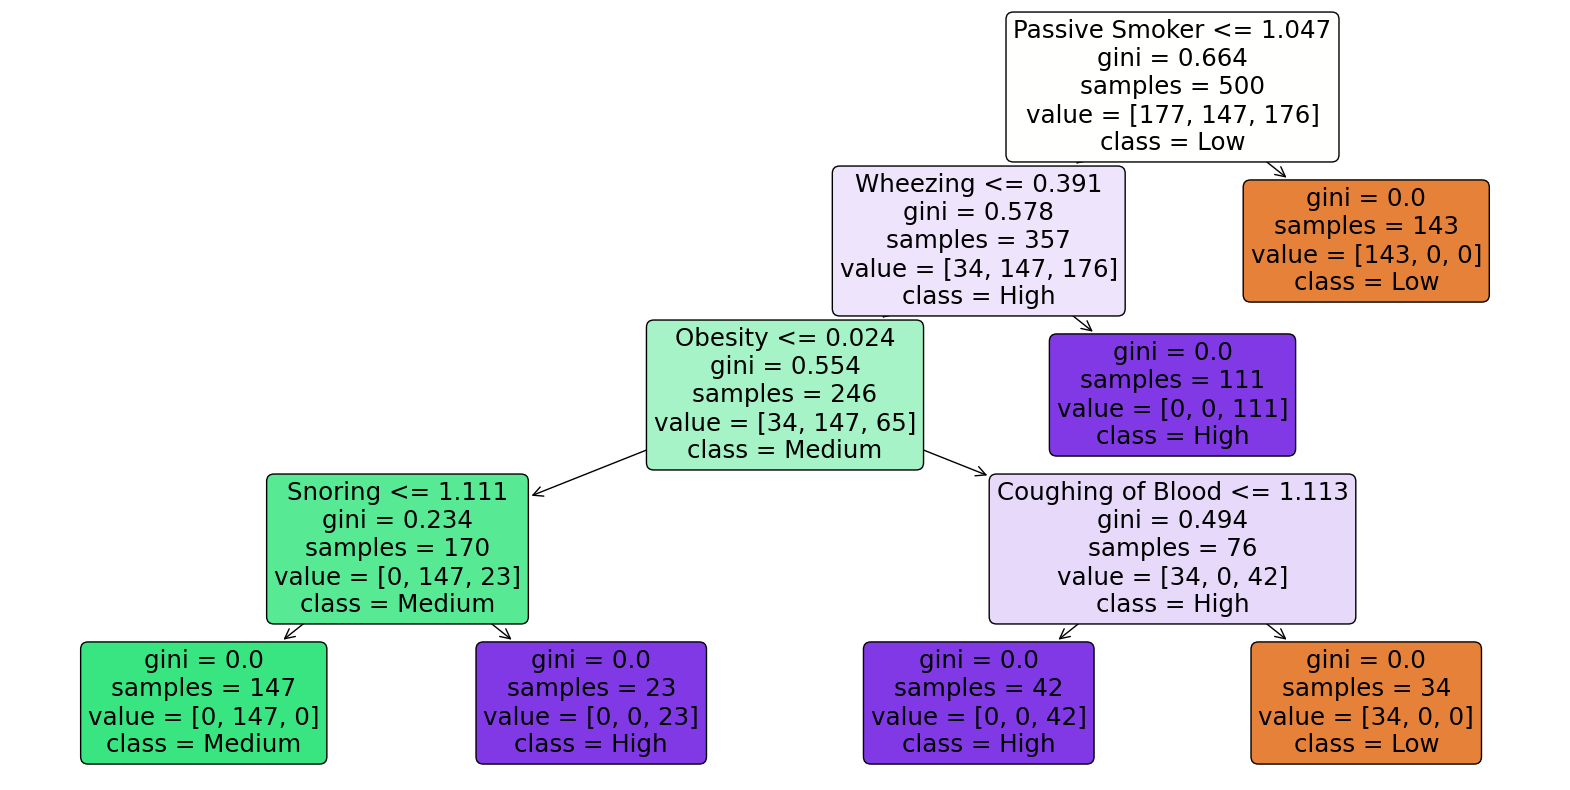

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
print(df['Level'])
# Visualize the decision tree
plt.figure(figsize=(20,10))  # Adjust the figure size as needed
plot_tree(clf, feature_names=X.columns, class_names=df['Level'], filled=True, rounded=True)
plt.show()

KNN Accuracy: 1.0
kNN Cross-Validation Scores: [1.   0.99 0.97 0.97 0.98]
0.98 accuracy with a standard deviation of 0.01
[0. 1. 1. 1.]
[0. 1. 1. 1.]
[0. 1. 1. 1.]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


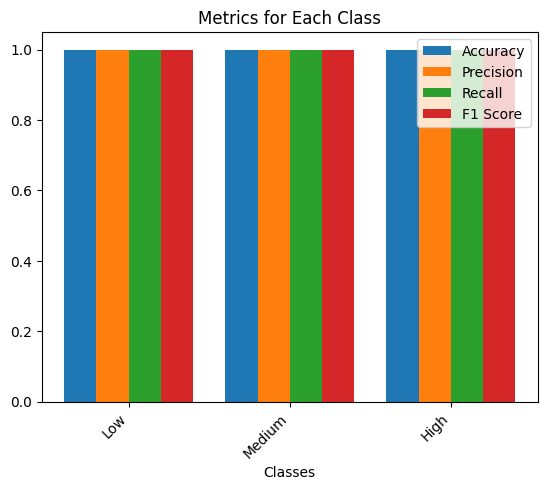

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed

# Fit the classifier to the training data
knn_mod = knn.fit(x_train_proc, y_train)

# Predict the classes for test set
y_pred_knn = knn.predict(x_test_proc)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)

# Use Cross-validation for kNN Classifier
knn_cv_scores = cross_val_score(knn_mod, x_test_proc, y_test, cv=5)
print(f"kNN Cross-Validation Scores: {knn_cv_scores}")
print("%0.2f accuracy with a standard deviation of %0.2f" % (knn_cv_scores.mean(), knn_cv_scores.std()))




metrics = precision_recall_fscore_support(clf_mod.predict(x_test_proc), y_test, average=None, labels=str(df['Level']))

# Extract individual metrics
precision, recall, f1, _ = metrics

print(precision)
print(recall)
print(f1)

#inserting scores pulled from metrics

precision, recall, f1 = [1,1,1],[1,1,1],[1,1,1]

classes = ['Low','Medium','High']
x = np.arange(len(classes))

fig, ax = plt.subplots()
bar_width = 0.2

# Plot accuracy
ax.bar(x - 1.5 * bar_width, [accuracy_knn] * len(classes), bar_width, label='Accuracy')

# Plot precision, recall, and F1 score
ax.bar(x - 0.5 * bar_width, precision, bar_width, label='Precision')
ax.bar(x + 0.5 * bar_width, recall, bar_width, label='Recall')
ax.bar(x + 1.5 * bar_width, f1, bar_width, label='F1 Score')

ax.set_xticks(x)
ax.set_xticklabels(classes, rotation=45, ha='right')  # Rotate labels for better visibility
ax.legend()

plt.xlabel('Classes')
plt.title('Metrics for Each Class')
plt.show()

The K-Nearest Neighbors model was able to achieve nearly perfect accuracy, precision, recall, and F1 score. These metrics indicate that the KNN model is a powerful predictive tool for lung cancer severity based on this matrix of risk factors and known symptoms. The metrics held constant after k-fold cross-validation where k=10.

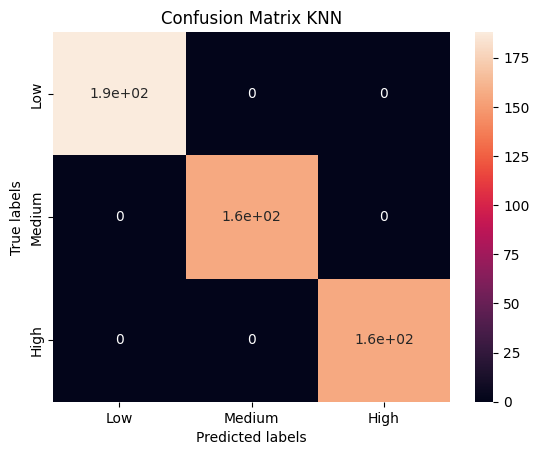

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get predictions
y_pred_knn = knn_mod.predict(x_test_proc)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)

# Set up plot
ax = plt.subplot()

# Create heatmap
sns.heatmap(cm, annot=True, ax=ax)

# Set labels
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_xticklabels(['Low','Medium',"High"])  # Use column labels as x-axis tick labels
ax.set_yticklabels(['Low','Medium',"High"])  # Use column labels as y-axis tick labels

# Set title
ax.set_title('Confusion Matrix KNN')

# Display the plot
plt.show()

Here we observe high levels of accuracy visualized in a confusion matrix for the K-Nearest Neighbor model that we have generated.

There are no individuals from our test data that were misclassified by our KNN model based on this visualization and the performance metrics observed above.

In [ ]:
df2 = pd.read_csv('/content/cancer patient data sets.csv')
df2.drop('Patient Id', axis=1,inplace=True)
print(df2.info())
y_n= label_encoding.fit_transform(df["Level"])
X_n= df.drop('Level', axis=1)


for col in X_n.columns:
    if X_n[col].dtype == 'object':
        X_n[col] = label_encoding.fit_transform(X_n[col])


# Scale the data. We use MinMax due to the non-Gaussian distribution of the data.
scaler_minmax = MinMaxScaler()
X_processed= scaler_minmax.fit_transform(X_n)

# Perform K-means clustering. We know there are 3 classes and so we seed with 3 centroids.
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_processed)

# Initialize DBSCAN object
dbscan = DBSCAN(eps=0.35, min_samples=50)

# Fit DBSCAN clustering model
dbscan.fit(X_processed)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards      1000 non-null   int64 
 7   Genetic Risk              1000 non-null   int64 
 8   chronic Lung Disease      1000 non-null   int64 
 9   Balanced Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive Smoker            1000 non-null   int64 
 13  Chest Pain                1000 non-null   int64 
 14  Coughing of Blood        

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


DBSCAN(eps=0.35, min_samples=50)

In [ ]:
# Evaluate K-means Clustering
kmeans_silhouette = silhouette_score(X_processed, kmeans.labels_)
print("K-means Clustering Silhouette Score:", kmeans_silhouette)

# Evaluate K-means Clustering
dbscan_silhouette = silhouette_score(X_processed, dbscan.labels_)
print("dbscan Clustering Silhouette Score:", dbscan_silhouette)

K-means Clustering Silhouette Score: 0.3533879773363325
dbscan Clustering Silhouette Score: 0.07915866679890553


The low sihouette scores observed at this step indicate that neither k-means clustering nor is density based clustering going to be appropriate for analyzing these data.

In [ ]:
# Get the number of clusters (excluding noise points)
n_clusters_ = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
print("Number of clusters:", n_clusters_)

Number of clusters: 5


*Note there is a potential that alteration of the clustering parameters will improve the overall accuracy of the density based clustering algorithm. However, several configurations were tested and none achieved significant success.

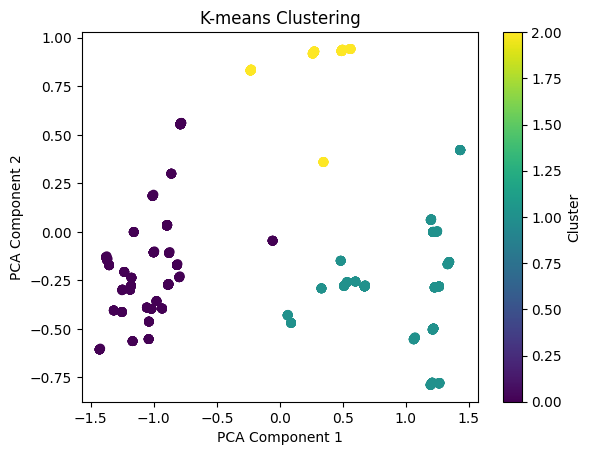

In [ ]:
# Reduce dimensionality for visualization (assuming X_processed has more than 2 features)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed)

# Visualize K-means clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

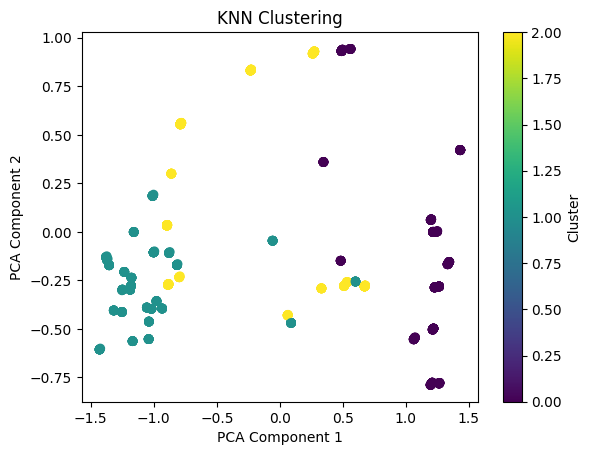

In [ ]:


# Visualize KNN clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('KNN Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

For future analysis I would like to explore different strategies for both scaling the data and treating the scales as different types of objects(i.e. strings vs float vs integer). In this case we considered the 8 point scale as integers with increasing severity. This is likely the most effective methodology, but appropriate rigor would dictate that all avenues be explored.

Through our modeling we have shown that these factors are good predictors of lung cancer severity within the lung cancer population.

Our model is a good basis for expansion into determining cancer likelihood in the greater population.